# CirComPara Pipeline

To demonstrate Dugong ́s effectiveness to distribute and run bioinformatics tools in alternative computational environments, the CirComPara pipeline was implemented in a Dugong container and tested in different OS with the aid of virtual machines (VM) or cloud computing servers.

CirComPara is a computational pipeline to detect, quantify, and correlate expression of linear and circular RNAs from RNA-seq data. Is a highly complex pipeline, which employs a series of bioinformatics software and was originally designed to run in an Ubuntu Server 16.04 LTS (x64).

Although authors provide details regarding the expected versions of each software and their dependency requirements, several problems can still be encountered during CirComPara implementation by inexperienced users.

See documentation for CirComPara installation details: https://github.com/egaffo/CirComPara

-----------------------------------------------------------------------------------------------------------------------

## Pipeline steps

- The test data is already unpacked and available in the path: **/headless/CirComPara/test_circompara/**

- The **meta.csv** and **vars.py** files are already configured to run CirComPara, as documented: https://github.com/egaffo/CirComPara

- Defining the folder for the analysis with the CirComPara of the test data provided by the developers of the tool:

In [1]:
from functools import partial
from os import chdir

chdir('/headless/CirComPara/test_circompara/analysis')

- Viewing files from /headless/CirComPara/test_circompara/

In [2]:
from IPython.display import FileLinks, FileLink

FileLinks('/headless/CirComPara/test_circompara/')

/headless/CirComPara/test_circompara/
  meta_se.csv
  meta.csv
  vars.py
/headless/CirComPara/test_circompara/analysis/
  .sconsign.dblite
  meta.csv
  vars.py
/headless/CirComPara/test_circompara/annotation/
  CFLAR_HIPK3.fa.byo_index
  CFLAR_HIPK3.fa.fai
  CFLAR_HIPK3.fa
  CFLAR_HIPK3.gtf
/headless/CirComPara/test_circompara/reads/
  readsB_1.fastq.gz
  readsA_2.fastq.gz
  readsA_1.fastq.gz
  readsB_2.fastq.gz

- Viewing the contents of the configuration file: vars.py

In [3]:
!cat /headless/CirComPara/test_circompara/analysis/vars.py

META            = "meta.csv"
GENOME_FASTA    = '/headless/CirComPara/test_circompara/annotation/CFLAR_HIPK3.fa'
ANNOTATION      = '/headless/CirComPara/test_circompara/annotation/CFLAR_HIPK3.gtf' 
CIRI            = "/headless/CirComPara/bin/CIRI_v2.0.2.pl" 
CPUS            = "3"
PREPROCESSOR    = "trimmomatic"
CIRCRNA_METHODS = "ciri,circexplorer,findcirc,testrealign"
TOGGLE_TRANSCRIPTOME_RECONSTRUCTION = 'False'
DIFF_EXP = 'False'
DESEQ = 'False'
PREPROCESSOR_PARAMS = "MAXINFO:40:0.5 LEADING:20 TRAILING:20 SLIDINGWINDOW:4:30 MINLEN:35 AVGQUAL:30"
CUFFNORM_EXTRA_PARAMS = "--output-format cuffdiff"
BWA_PARAMS = "-T 19" ## parameter recomended by CIRI manual


- Viewing the contents of the configuration file: meta.csv

In [4]:
!cat /headless/CirComPara/test_circompara/analysis/meta.csv

file,sample,condition,adapter
/headless/CirComPara/test_circompara/reads/readsA_1.fastq.gz,sample_A,A,/headless/CirComPara/tools/Trimmomatic-0.36/adapters/TruSeq3-PE-2.fa
/headless/CirComPara/test_circompara/reads/readsA_2.fastq.gz,sample_A,A,/headless/CirComPara/tools/Trimmomatic-0.36/adapters/TruSeq3-PE-2.fa
/headless/CirComPara/test_circompara/reads/readsB_1.fastq.gz,sample_B,B,/headless/CirComPara/tools/Trimmomatic-0.36/adapters/TruSeq3-PE-2.fa
/headless/CirComPara/test_circompara/reads/readsB_2.fastq.gz,sample_B,B,/headless/CirComPara/tools/Trimmomatic-0.36/adapters/TruSeq3-PE-2.fa


- Running CirCompara with test data

In [5]:
!../../circompara

scons: Reading SConscript files ...
scons: done reading SConscript files.
scons: Building targets ...
gtfToGenePred -infoOut=junk2_dbs/genePred.transcripts.info /headless/CirComPara/test_circompara/annotation/CFLAR_HIPK3.gtf junk2_dbs/CFLAR_HIPK3.genePred
cut -f9 junk2_dbs/genePred.transcripts.info | grep -v geneName | paste - junk2_dbs/CFLAR_HIPK3.genePred > junk2_dbs/CFLAR_HIPK3.genePred.wgn
hisat2-build -f --seed 1 -p 3 /headless/CirComPara/test_circompara/annotation/CFLAR_HIPK3.fa junk2_dbs/indexes/hisat2/CFLAR_HIPK3
Settings:
  Output files: "junk2_dbs/indexes/hisat2/CFLAR_HIPK3.*.ht2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Local offset rate: 3 (one in 8)
  Local fTable chars: 6
  Local sequence length: 57344
  Local sequence overlap between two consecutive indexes: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  R

[SEGEMEHL] Mon Aug  7 03:44:31 2017: sortlistL: iterating 5979 elems[SEGEMEHL] Mon Aug  7 03:44:31 2017: sortlistL: looping 13302 elems[SEGEMEHL] Mon Aug  7 03:44:31 2017: sortlistL: iterating 13304 elems[SEGEMEHL] Mon Aug  7 03:44:31 2017: sortlistsL: exiting happily!
[SEGEMEHL] Mon Aug  7 03:44:31 2017: alurusortint: enter tprime
[SEGEMEHL] Mon Aug  7 03:44:31 2017: tprime: init arrays
[SEGEMEHL] Mon Aug  7 03:44:31 2017: tprime: scan B
[SEGEMEHL] Mon Aug  7 03:44:31 2017: tprime: iterating i=13304 elements with lenB=5979
[SEGEMEHL] Mon Aug  7 03:44:31 2017: tprime: exit
[SEGEMEHL] Mon Aug  7 03:44:31 2017: alurusortint: enter alurusortint
[SEGEMEHL] Mon Aug  7 03:44:31 2017: alurusortint: classify int
init bit array of 748
[SEGEMEHL] Mon Aug  7 03:44:31 2017: alurusortint: getting bit
[SEGEMEHL] Mon Aug  7 03:44:31 2017: alurusortint: init bcktsA
init bit array of 748
[SEGEMEHL] Mon Aug  7 03:44:31 2017: alurusortint: countingsort
[SEGEMEHL] Mon Aug  7 03:44:31 2017: countingsortint

Exiting Ebwt::buildToDisk()
Returning from initFromVector
Wrote 4248189 bytes to primary EBWT file: junk2_dbs/indexes/bowtie2/CFLAR_HIPK3.1.bt2
Wrote 40240 bytes to secondary EBWT file: junk2_dbs/indexes/bowtie2/CFLAR_HIPK3.2.bt2
Re-opening _in1 and _in2 as input streams
Returning from Ebwt constructor
Headers:
    len: 160933
    bwtLen: 160934
    sz: 40234
    bwtSz: 40234
    lineRate: 6
    offRate: 4
    offMask: 0xfffffff0
    ftabChars: 10
    eftabLen: 20
    eftabSz: 80
    ftabLen: 1048577
    ftabSz: 4194308
    offsLen: 10059
    offsSz: 40236
    lineSz: 64
    sideSz: 64
    sideBwtSz: 48
    sideBwtLen: 192
    numSides: 839
    numLines: 839
    ebwtTotLen: 53696
    ebwtTotSz: 53696
    color: 0
    reverse: 0
Total time for call to driver() for forward index: 00:00:00
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences

cd /headless/CirComPara/test_circompara/analysis/samples/sample_A/processings/hisat2_out && hisat2 -x /headless/CirComPara/test_circompara/analysis/junk2_dbs/indexes/hisat2/CFLAR_HIPK3 --dta --dta-cufflinks --rg-id sample_A --no-discordant --no-mixed --no-overlap -p 3 -1 /headless/CirComPara/test_circompara/analysis/samples/sample_A/processings/preprocess/trimmomatic/readsA_1.fq.P.qtrim.gz -2 /headless/CirComPara/test_circompara/analysis/samples/sample_A/processings/preprocess/trimmomatic/readsA_2.fq.P.qtrim.gz 2> /headless/CirComPara/test_circompara/analysis/samples/sample_A/processings/hisat2_out/sample_A_hisat2.log | samtools view -hu -@ 3 - | samtools sort -O 'bam' -@ 3 -T hisat2_sample_A > /headless/CirComPara/test_circompara/analysis/samples/sample_A/processings/hisat2_out/sample_A_hisat2.bam && cd /headless/CirComPara/test_circompara/analysis
samtools fastq -f 12 -F 3328 -n -s /headless/CirComPara/test_circompara/analysis/samples/sample_A/processings/unmapped_reads/singleton.fas

segemehl.x -s -i /headless/CirComPara/test_circompara/analysis/junk2_dbs/indexes/segemehl/CFLAR_HIPK3.idx -d /headless/CirComPara/test_circompara/annotation/CFLAR_HIPK3.fa -q samples/sample_A/processings/unmapped_reads/unmapped_1.fastq.gz -p samples/sample_A/processings/unmapped_reads/unmapped_2.fastq.gz -S -t 3 -u samples/sample_A/processings/circRNAs/segemehl/processings_unmatched.fastq -C -T | samtools view -u -@3 - | samtools sort -@3 -O 'bam' -T segemehl_processings > samples/sample_A/processings/circRNAs/segemehl/processings.bam && gzip samples/sample_A/processings/circRNAs/segemehl/processings_unmatched.fastq
[SEGEMEHL] Mon Aug  7 03:45:31 2017: reading queries in 'samples/sample_A/processings/unmapped_reads/unmapped_1.fastq.gz'.
[SEGEMEHL] Mon Aug  7 03:45:31 2017: 1770 query sequences found.
[SEGEMEHL] Mon Aug  7 03:45:31 2017: reading mates in 'samples/sample_A/processings/unmapped_reads/unmapped_2.fastq.gz'.
[SEGEMEHL] Mon Aug  7 03:45:31 2017: 1770 mate sequences found.
[SE

[M::mem_process_seqs] Processed 3540 reads in 2.344 CPU sec, 0.788 real sec
[main] Version: 0.7.15-r1140
[main] CMD: bwa mem -t 3 -T 19 /headless/CirComPara/test_circompara/analysis/junk2_dbs/indexes/bwa/CFLAR_HIPK3 /headless/CirComPara/test_circompara/analysis/samples/sample_A/processings/unmapped_reads/unmapped_1.fastq.gz /headless/CirComPara/test_circompara/analysis/samples/sample_A/processings/unmapped_reads/unmapped_2.fastq.gz
[main] Real time: 0.851 sec; CPU: 2.348 sec
[Mon Aug  7 03:45:36 2017] CIRI begins running
[Mon Aug  7 03:45:36 2017] Loading reference
[Mon Aug  7 03:45:36 2017] Requesting system to split SAM into 3 pieces
[Mon Aug  7 03:45:36 2017] First scanning
 Worker 1 begins to scan processings_bwa.samab.
 Worker 2 begins to scan processings_bwa.samac.
 Worker 3 begins to scan processings_bwa.samaa.
 Worker 1 finished reporting.
 Worker 2 finished reporting.
 Worker 3 finished reporting.
 Candidate reads with splicing signals: 108
 Candidate reads with PEM signals: 1

grep CIRCULAR samples/sample_B/processings/circRNAs/find_circ_out/sites.bed | { grep UNAMBIGUOUS_BP || true; } | { grep ANCHOR_UNIQUE || true; } > samples/sample_B/processings/circRNAs/find_circ_out/circ_candidates.bed
/headless/CirComPara/src/findcirc_compare.R -l sample_A,sample_B -i samples/sample_A/processings/circRNAs/find_circ_out/circ_candidates.bed,samples/sample_B/processings/circRNAs/find_circ_out/circ_candidates.bed -o circRNA_collection/find_circ_compared.csv
testrealign.x -d /headless/CirComPara/test_circompara/annotation/CFLAR_HIPK3.fa -q samples/sample_A/processings/circRNAs/testrealign/processings_sorted.sam.gz -n -U samples/sample_A/processings/circRNAs/testrealign/splicesites.bed -T samples/sample_A/processings/circRNAs/testrealign/transrealigned.bed -t 3
[SEGEMEHL] Mon Aug  7 03:45:39 2017: reading database sequences.
[SEGEMEHL] Mon Aug  7 03:45:39 2017: 2 database sequences found.
[SEGEMEHL] Mon Aug  7 03:45:39 2017: reading query files.
testrealign.x -d /headless/C

  |....................                                             |  31%
  ordinary text without R code

  |......................                                           |  33%
label: show_circrnas_shared (with options) 
List of 2
 $ echo   : logi FALSE
 $ include: logi TRUE

  |.......................                                          |  35%
   inline R code fragments

  |........................                                         |  37%
label: show_circrnas_2reads_2methods_sample (with options) 
List of 2
 $ echo   : logi FALSE
 $ include: logi TRUE

  |.........................                                        |  39%
  ordinary text without R code

  |..........................                                       |  41%
label: plot_circrnas_2reads_2methods_sample (with options) 
List of 2
 $ echo   : logi FALSE
 $ include: logi TRUE

  |............................                                     |  43%
   inline R code fragments

  |....................

632 GFF lines processed.
42655 SAM alignment pairs processed.
echo "No reads in samples/sample_A/processings/preprocess/trimmomatic/readsA_1.fq.P.qtrim.gz" > samples/sample_A/processings/preprocess/fastqc_stats/readsA_1.fq.P.qtrim_fastqc.html && fastqc samples/sample_A/processings/preprocess/trimmomatic/readsA_1.fq.P.qtrim.gz -o samples/sample_A/processings/preprocess/fastqc_stats > samples/sample_A/processings/preprocess/fastqc_stats/readsA_1.fq.P.qtrim_fastqc.log 2> samples/sample_A/processings/preprocess/fastqc_stats/readsA_1.fq.P.qtrim_fastqc.err
echo "No reads in samples/sample_A/processings/preprocess/trimmomatic/readsA_1.fq.U.qtrim.gz" > samples/sample_A/processings/preprocess/fastqc_stats/readsA_1.fq.U.qtrim_fastqc.html && fastqc samples/sample_A/processings/preprocess/trimmomatic/readsA_1.fq.U.qtrim.gz -o samples/sample_A/processings/preprocess/fastqc_stats > samples/sample_A/processings/preprocess/fastqc_stats/readsA_1.fq.U.qtrim_fastqc.log 2> samples/sample_A/processings/pre

-----------------------------------------------------------------------------------------------------------------------

## Results:

- Viewing output files after running CirComPara:

In [6]:
from IPython.display import FileLinks, FileLink

FileLinks('/headless/CirComPara/test_circompara/analysis/')

/headless/CirComPara/test_circompara/analysis/
  .sconsign.dblite
  meta.csv
  vars.py
/headless/CirComPara/test_circompara/analysis/circRNA_collection/
  circrna_maps_counts.txt
  CIRCexplorer_compared.csv
  testrealign_compared.csv
  find_circ_compared.csv
  ciri_compared.csv
  circrnas.gtf
  combined_circrnas.gtf.gz
/headless/CirComPara/test_circompara/analysis/circrna_analyze/
  sample_A_circrna_norm_expression.csv
  circRNAs_analysis.html
  circRNA_gene_expression_correlation.csv
  circRNAs_per_gene.csv
  sample_B_circrna_norm_expression.csv
  circRNA_expression_per_sample.csv
  methods_shared_circRNA_counts.csv
/headless/CirComPara/test_circompara/analysis/circrna_analyze/Figs/
  show_circrnas_shared-1.svg
  corr_density_plot-1.png
  plot_circ_gene_expr-1.svg
  show_circrnas_per_method-1.svg
  correlations_box-1.svg
  plot_circrnas_per_gene-1.svg
  cumulative_expression_box-1.png
  corr_density_plot-1.svg
  plot_gene_expressed_by_sample-1.svg
  show_circrnas_per_method-1.png
  plot_circrnas_per_gene-1.png
  correlations_box-1.png
  plot_circrnas_2reads_2methods_sample-1.png
  plot_circ_gene_expr-1.png
  plot_circrnas_2reads_2methods_sample-1.svg
  cumulative_expression_box-1.svg
  show_circrnas_shared-1.png
  plot_gene_expressed_by_sample-1.png
/headless/CirComPara/test_circompara/analysis/cuffdiff/
  tss_groups.fpkm_tracking
  isoforms.read_group_tracking
  genes.read_group_tracking
  tss_groups.read_group_tracking
  isoforms.count_tracking
  genes.count_tracking
  cds.count_tracking
  read_groups.info
  run.info
  cds.fpkm_tracking
  genes.fpkm_tracking
  tss_groups.count_tracking
  isoforms.fpkm_tracking
  cds.read_group_tracking
/headless/CirComPara/test_circompara/analysis/cuffquant/sample_A_hisat2/
  abundances.cxb
/headless/CirComPara/test_circompara/analysis/cuffquant/sample_B_hisat2/
  abundances.cxb
/headless/CirComPara/test_circompara/analysis/junk2_dbs/
  CFLAR_HIPK3.genePred.wgn
  genePred.transcripts.info
  CFLAR_HIPK3.genePred
/headless/CirComPara/test_circompara/analysis/junk2_dbs/indexes/bowtie2/
  CFLAR_HIPK3.2.bt2
  CFLAR_HIPK3.rev.1.bt2
  CFLAR_HIPK3.4.bt2
  CFLAR_HIPK3.3.bt2
  CFLAR_HIPK3.1.bt2
  CFLAR_HIPK3.rev.2.bt2
/headless/CirComPara/test_circompara/analysis/junk2_dbs/indexes/bwa/
  CFLAR_HIPK3.pac
  CFLAR_HIPK3.bwt
  CFLAR_HIPK3.amb
  CFLAR_HIPK3.sa
  CFLAR_HIPK3.ann
/headless/CirComPara/test_circompara/analysis/junk2_dbs/indexes/hisat2/
  CFLAR_HIPK3.7.ht2
  CFLAR_HIPK3.6.ht2
  CFLAR_HIPK3.5.ht2
  CFLAR_HIPK3.3.ht2
  CFLAR_HIPK3.1.ht2
  CFLAR_HIPK3.8.ht2
  CFLAR_HIPK3.2.ht2
  CFLAR_HIPK3.4.ht2
/headless/CirComPara/test_circompara/analysis/junk2_dbs/indexes/segemehl/
  CFLAR_HIPK3.idx
/headless/CirComPara/test_circompara/analysis/junk2_dbs/indexes/star/CFLAR_HIPK3/
  genomeParameters.txt
  Genome
  chrLength.txt
  SA
  chrName.txt
  chrStart.txt
  chrNameLength.txt
  SAindex
  Log.out
/headless/CirComPara/test_circompara/analysis/read_stats_collect/
  read_stats_collect.txt
/headless/CirComPara/test_circompara/analysis/samples/sample_A/processings/circRNAs/CIRCexplorer/
  fusion_junction.txt
  CIRCexplorer_circ.txt
  CIRCExplorer_mapped_reads_count.txt
/headless/CirComPara/test_circompara/analysis/samples/sample_A/processings/circRNAs/CIRCexplorer/star_out/
  SJ.out.tab
  Log.progress.out
  Aligned.sortedByCoord.out.bam
  Chimeric.out.sam
  Log.out
  Chimeric.out.junction
  Log.final.out
/headless/CirComPara/test_circompara/analysis/samples/sample_A/processings/circRNAs/CIRCexplorer/star_out/_STARgenome/
  exonGeTrInfo.tab
  transcriptInfo.tab
  sjdbList.fromGTF.out.tab
  exonInfo.tab
  sjdbList.out.tab
  geneInfo.tab
  sjdbInfo.txt
/headless/CirComPara/test_circompara/analysis/samples/sample_A/processings/circRNAs/ciri_out/
  processings_ciri.out
  CIRI_mapped_reads_count.txt
  processings_ciri.out.log
  processings_bwa.sam.gz
  CIRIerror.log
/headless/CirComPara/test_circompara/analysis/samples/sample_A/processings/circRNAs/find_circ_out/
  processings_bt2.bam
  sites.bed
  bt2_firstpass.log


- Viewing graphic files after running CirComPara:

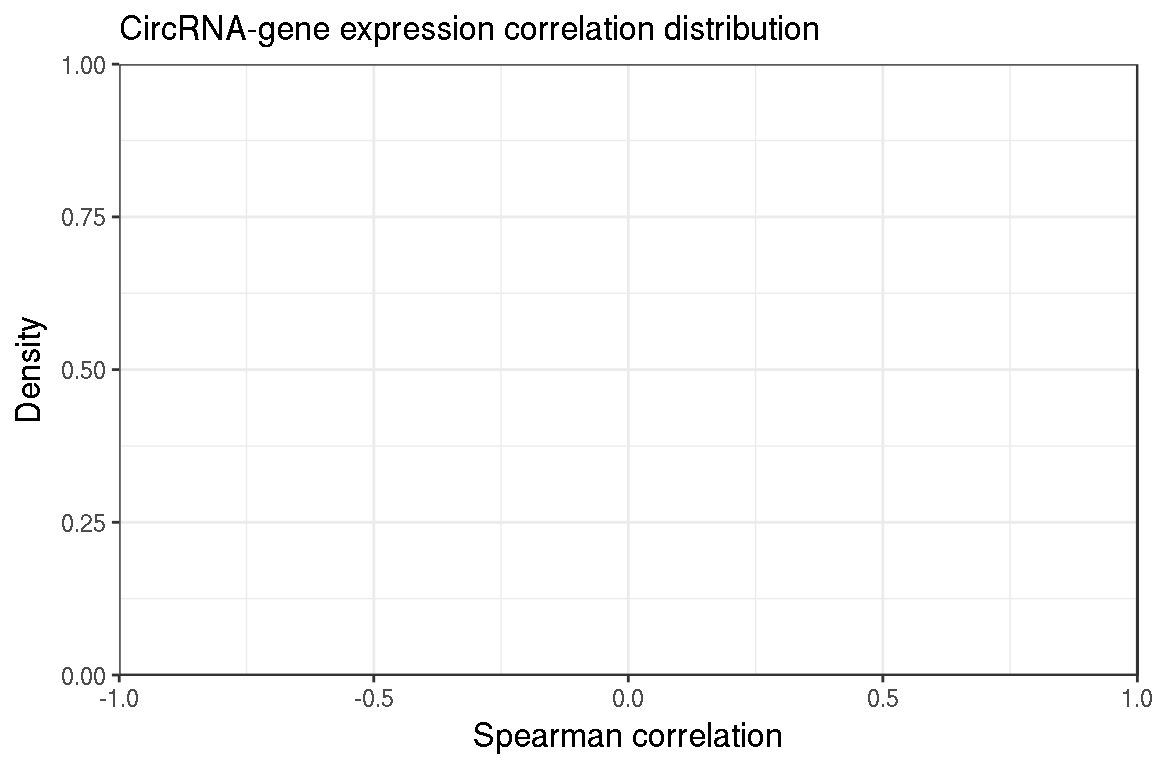

In [7]:
from IPython.display import Image
Image("/headless/CirComPara/test_circompara/analysis/circrna_analyze/Figs/corr_density_plot-1.png")

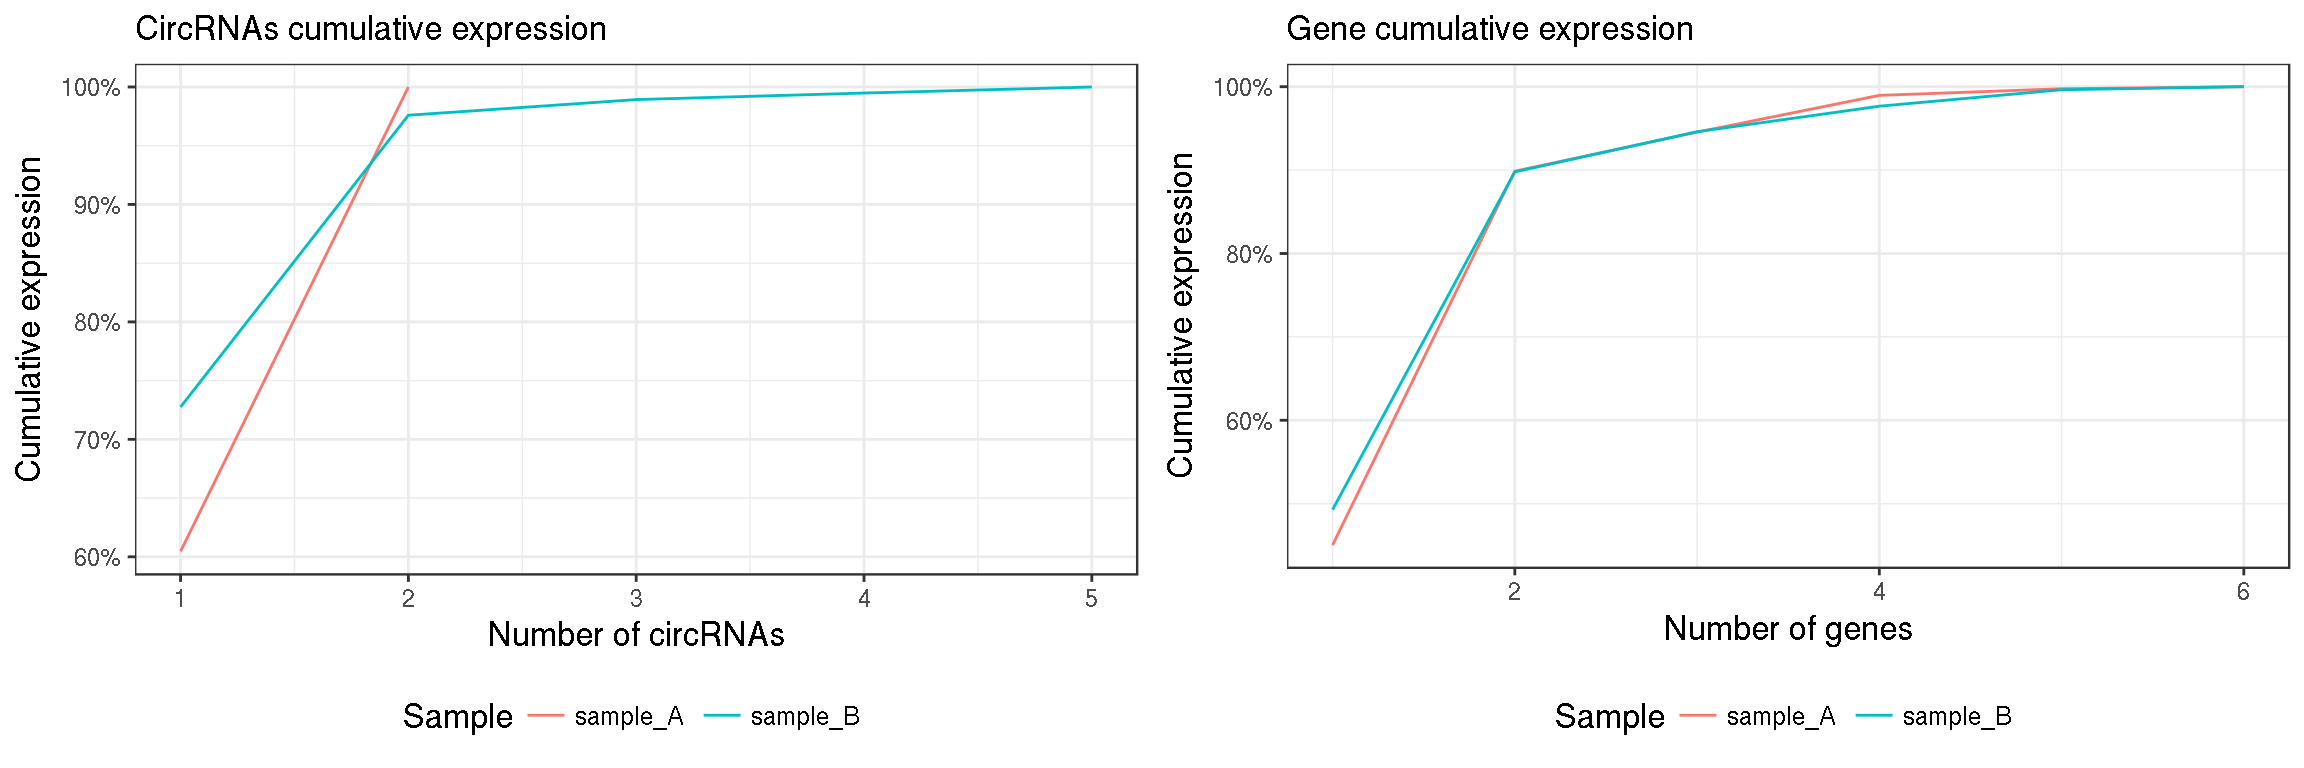

In [8]:
from IPython.display import Image
Image("/headless/CirComPara/test_circompara/analysis/circrna_analyze/Figs/cumulative_expression_box-1.png")

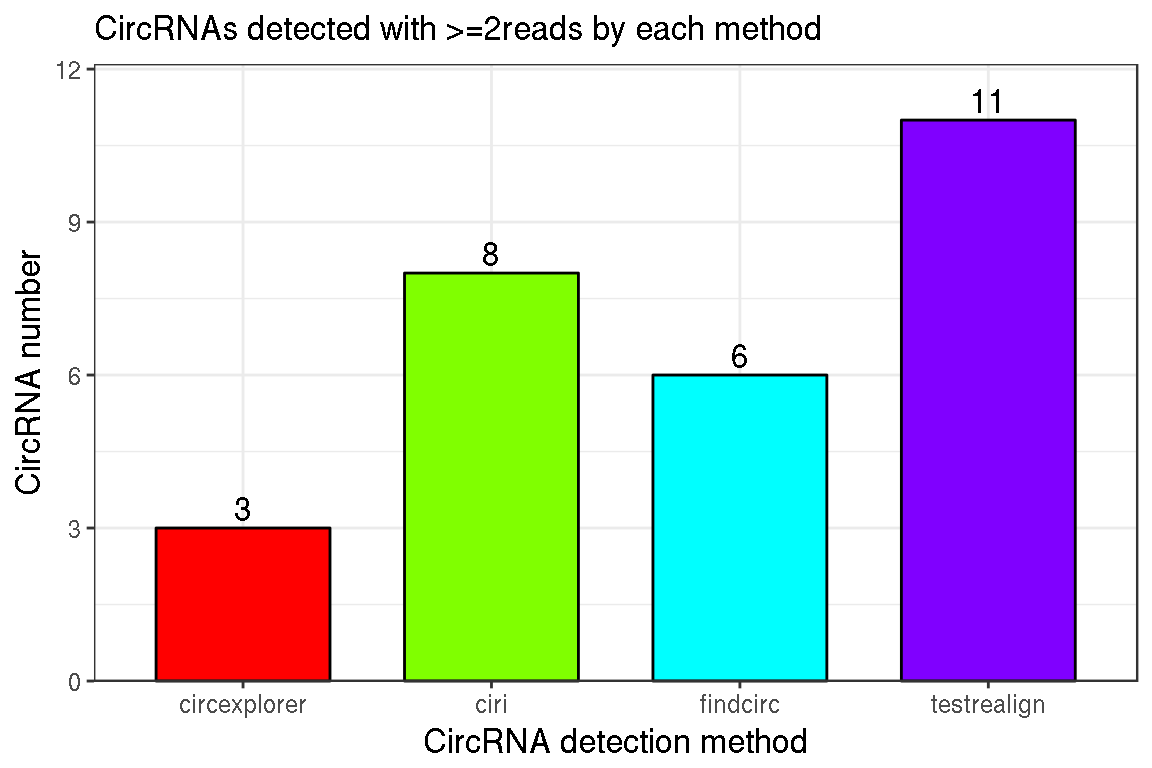

In [9]:
from IPython.display import Image
Image("/headless/CirComPara/test_circompara/analysis/circrna_analyze/Figs/show_circrnas_per_method-1.png")

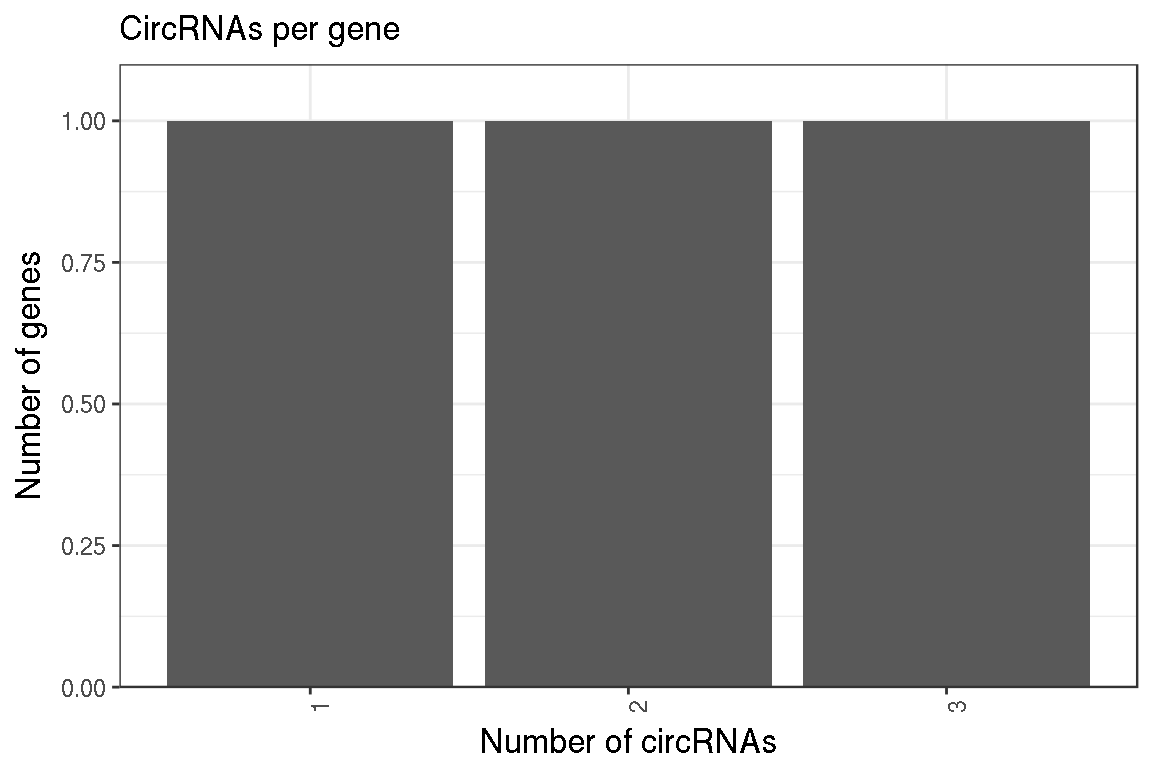

In [10]:
from IPython.display import Image
Image("/headless/CirComPara/test_circompara/analysis/circrna_analyze/Figs/plot_circrnas_per_gene-1.png")

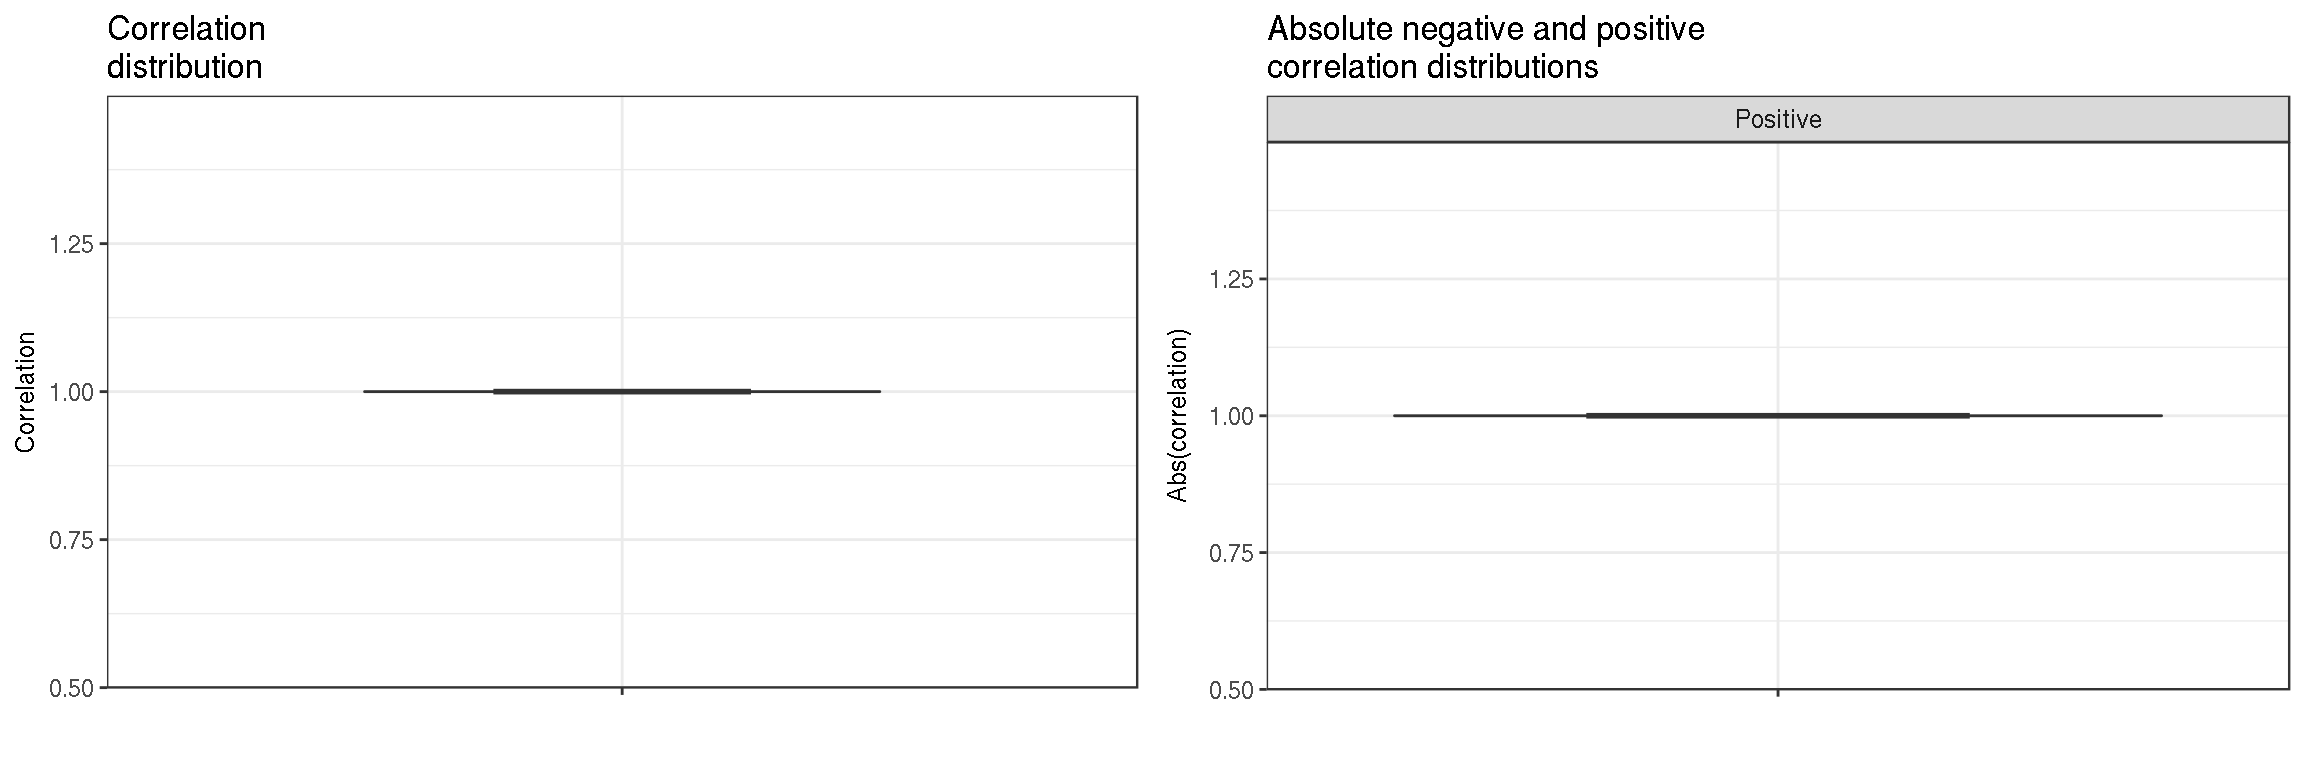

In [11]:
from IPython.display import Image
Image("/headless/CirComPara/test_circompara/analysis/circrna_analyze/Figs/correlations_box-1.png")

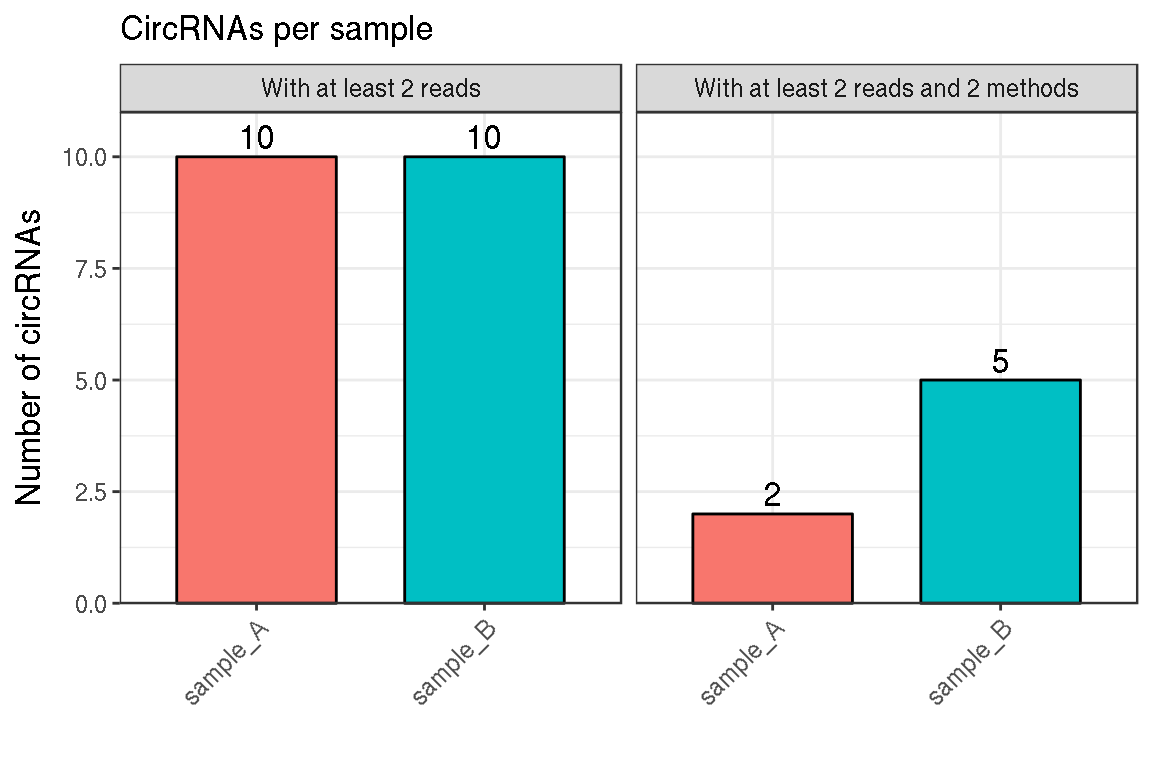

In [12]:
from IPython.display import Image
Image("/headless/CirComPara/test_circompara/analysis/circrna_analyze/Figs/plot_circrnas_2reads_2methods_sample-1.png")

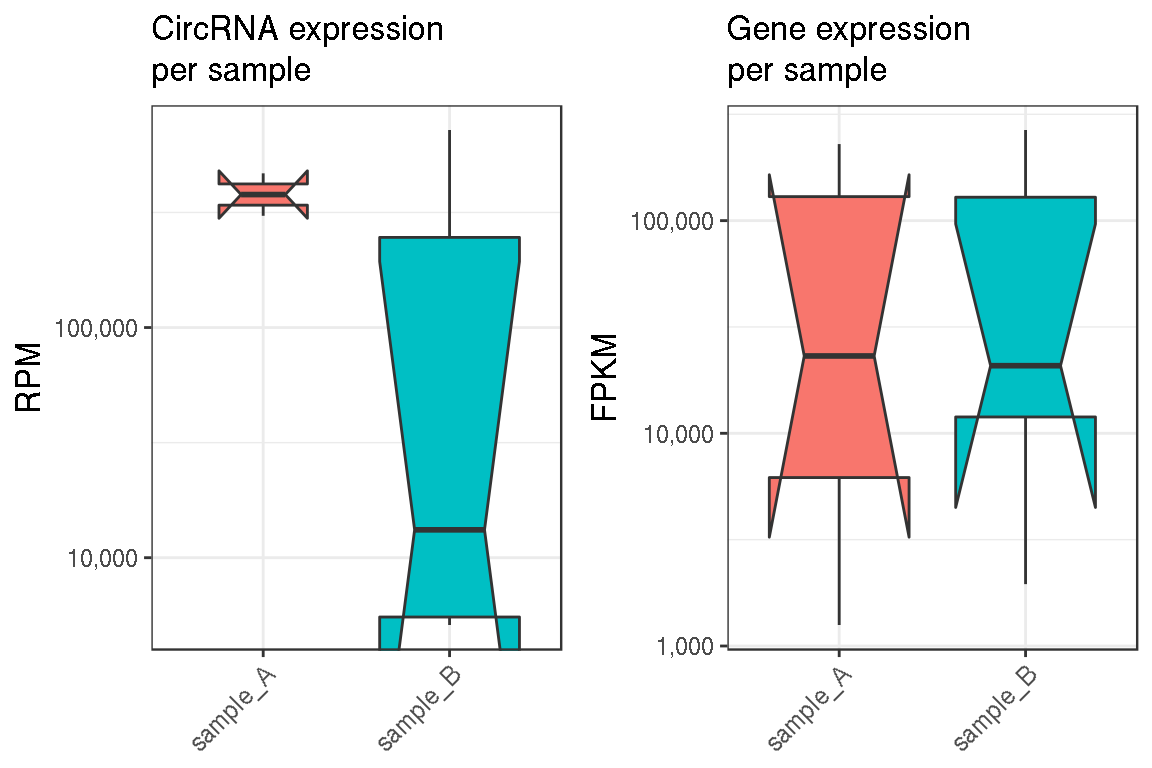

In [13]:
from IPython.display import Image
Image("/headless/CirComPara/test_circompara/analysis/circrna_analyze/Figs/plot_circ_gene_expr-1.png")

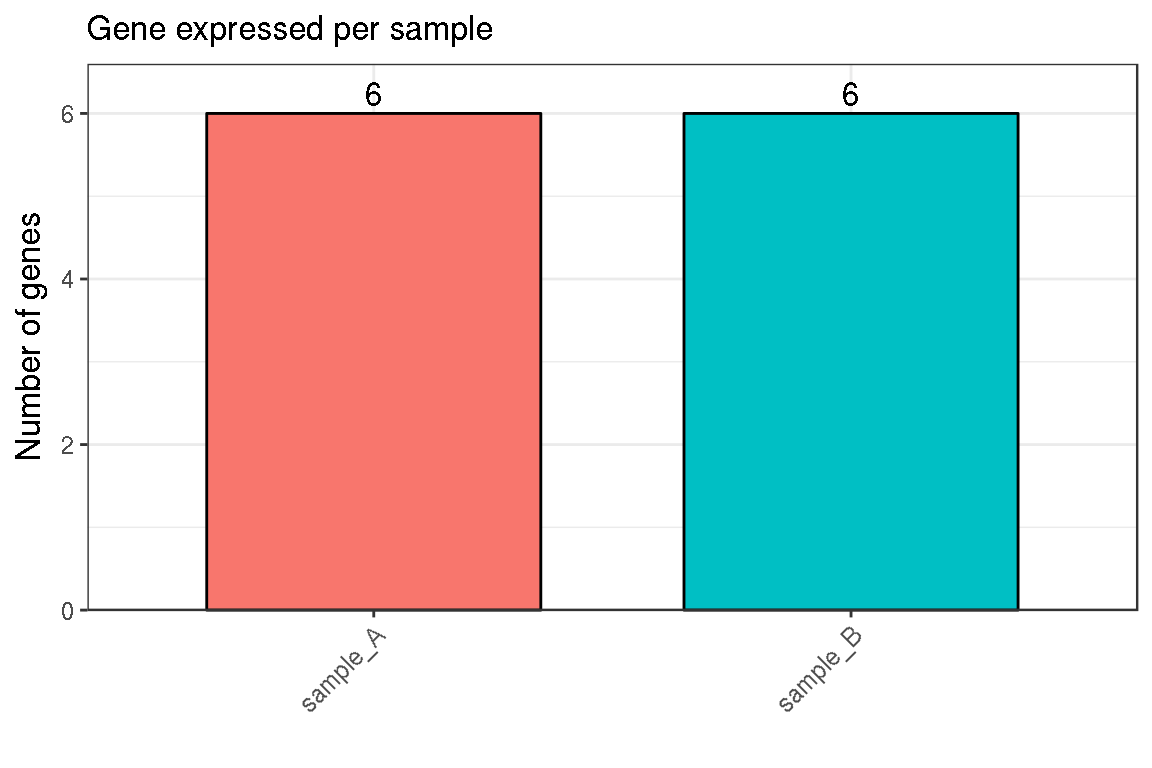

In [14]:
from IPython.display import Image
Image("/headless/CirComPara/test_circompara/analysis/circrna_analyze/Figs/plot_gene_expressed_by_sample-1.png")

-----------------------------------------------------------------------------------------------------------------------

**NOTE:** This pipeline is just an example of what you can do with Dugong. I